<a href="https://colab.research.google.com/github/kunalu/clvcs/blob/main/xgbclv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('New.csv')

In [ ]:

chunk = pd.read_csv('New.csv')
a = chunk.iloc[:,:1]
chunk.drop(a,axis=1,inplace=True)

In [ ]:
chunk.head()

,id,chain,dept,category,company,brand,date,productsize,productmeasure,purchasequantity,purchaseamount
0,4641896467,6,99,9909,107143070,5072,2012-05-16,12.0,OZ,1,3.69
1,4641896467,6,99,9909,107143070,5072,2012-07-29,12.0,OZ,1,1.99
2,4641896467,6,99,9909,107143070,5072,2012-08-05,24.0,OZ,1,2.99
3,4641896467,6,99,9909,107143070,5072,2012-08-13,12.0,OZ,1,1.99
4,4641897150,152,99,9909,107143070,5072,2012-10-03,12.0,OZ,1,2.99


In [ ]:
df1 = chunk[['id','date','purchasequantity','purchaseamount']]
df1.columns=['CustomerID','InvoiceDate','Quantity','Amount']

In [ ]:
from datetime import datetime, timedelta
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division

import plotly.offline as pyoff
import plotly.graph_objs as go

In [ ]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])

#creating YearMonth field for the ease of reporting and visualization
df1['InvoiceYearMonth'] = df1['InvoiceDate'].map(lambda date: 100*date.year + date.month)

#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
df1['Revenue'] = df1['Amount'] * df1['Quantity']
tx_revenue = df1.groupby(['InvoiceYearMonth'])['Revenue'].sum().reset_index()
tx_revenue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,InvoiceYearMonth,Revenue
0,201203,1610.09
1,201204,1957.70
2,201205,1638.05
3,201206,2051.29
4,201207,1610.90
5,201208,1813.39
6,201209,1648.41
7,201210,1649.55
8,201211,1661.35
9,201212,2045.72


In [ ]:
tx_revenue

,InvoiceYearMonth,Revenue
0,201203,1610.09
1,201204,1957.70
2,201205,1638.05
3,201206,2051.29
4,201207,1610.90
5,201208,1813.39
6,201209,1648.41
7,201210,1649.55
8,201211,1661.35
9,201212,2045.72


In [ ]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df1['InvoiceYearMonth']

0       201205
1       201207
2       201208
3       201208
4       201210
         ...  
5989    201307
5990    201307
5991    201307
5992    201307
5993    201307
Name: InvoiceYearMonth, Length: 5994, dtype: int64

In [ ]:
plot_data = [
    go.Scatter(
        x=tx_revenue['InvoiceYearMonth'],
        y=tx_revenue['Revenue'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Revenue'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()

#showing first 5 rows
tx_revenue.head()

#visualization - line graph
plot_data = [
    go.Scatter(
        x=tx_revenue.query("InvoiceYearMonth > 201112")['InvoiceYearMonth'],
        y=tx_revenue.query("InvoiceYearMonth > 201112")['MonthlyGrowth'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Montly Growth Rate'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
tx_revenue.query("InvoiceYearMonth > 201112")['InvoiceYearMonth'],
tx_revenue.query("InvoiceYearMonth > 201112")['MonthlyGrowth']

0          NaN
1     0.215895
2    -0.163278
3     0.252276
4    -0.214689
5     0.125700
6    -0.090979
7     0.000692
8     0.007153
9     0.231360
10    0.155476
11   -0.037436
12    0.130089
13   -0.001128
14    8.896947
15   -0.131625
16   -0.926775
Name: MonthlyGrowth, dtype: float64

In [ ]:
tx_monthly_active = df1.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

#print the dataframe
# tx_monthly_active

#plotting the output
plot_data = [
    go.Bar(
        x=tx_monthly_active['InvoiceYearMonth'],
        y=tx_monthly_active['CustomerID'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Active Customers'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:

# finding Monthly acyive customers
tx_monthly_active = df1.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()
plot_data = [
    go.Bar(
        x=tx_monthly_active['InvoiceYearMonth'],
        y=tx_monthly_active['CustomerID'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Active Customers'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
tx_monthly_active

,InvoiceYearMonth,CustomerID
0,201203,146
1,201204,163
2,201205,154
3,201206,160
4,201207,150
5,201208,148
6,201209,154
7,201210,140
8,201211,174
9,201212,176


In [ ]:
tx_revenue['InvoiceYearMonth'] = pd.to_datetime(tx_revenue['InvoiceYearMonth'])


In [ ]:
tx_revenue.fillna(tx_revenue.mean(),inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [ ]:
tx_monthly_sales = df1.groupby('InvoiceYearMonth')['Quantity'].sum().reset_index()

#print the dataframe
tx_monthly_sales

#plot
plot_data = [
    go.Bar(
        x=tx_monthly_sales['InvoiceYearMonth'],
        y=tx_monthly_sales['Quantity'],
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Monthly Total # of Order'
    )

fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
tx_user = pd.DataFrame(df1['CustomerID'].unique())
tx_user.columns = ['CustomerID']

#get the max purchase date for each customer and create a dataframe with it
tx_max_purchase = df1.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']

#we take our observation point as the max invoice date in our dataset
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')

tx_user.head()

#plot a recency histogram

plot_data = [
    go.Histogram(
        x=tx_user['Recency']
    )
]

plot_layout = go.Layout(
        title='Recency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)


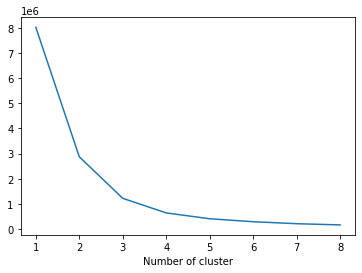

In [ ]:
from sklearn.cluster import KMeans

sse={}
tx_recency = tx_user[['Recency']]
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tx_recency)
    tx_recency["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

#function for ordering cluster numbers
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

In [ ]:
tx_frequency = df1.groupby('CustomerID').InvoiceDate.count().reset_index()
tx_frequency.columns = ['CustomerID','Frequency']

#add this data to our main dataframe
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')

#plot the histogram
plot_data = [
    go.Histogram(
        x=tx_user.query('Frequency < 1000')['Frequency']
    )
]

plot_layout = go.Layout(
        title='Frequency'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

#order the frequency cluster
tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

#see details of each cluster
tx_user.groupby('FrequencyCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,671.0,4.269747,3.719689,1.0,1.00,3.0,6.00,18.0
1,65.0,33.123077,12.634907,19.0,23.00,29.0,42.00,62.0
2,6.0,103.500000,29.439769,84.0,86.75,91.0,104.25,161.0
3,1.0,355.000000,NaN,355.0,355.00,355.0,355.00,355.0


In [ ]:
df1['Revenue'] = df1['Amount'] * df1['Quantity']
tx_revenue = df1.groupby('CustomerID').Revenue.sum().reset_index()

#merge it with our main dataframe
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')

#plot the histogram
plot_data = [
    go.Histogram(
        x=tx_revenue.query('Revenue < 10000')['Revenue']
    )
]

plot_layout = go.Layout(
        title='Monetary Value'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])


#order the cluster numbers
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)

#show details of the dataframe
tx_user.groupby('RevenueCluster')['Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,710.0,26.387606,32.763091,0.99,4.67,14.76,35.81,193.12
1,27.0,366.717407,133.354842,217.81,262.88,351.96,418.31,740.66
2,5.0,1315.846000,358.423104,948.14,1065.84,1249.20,1461.12,1854.93
3,1.0,41358.130000,NaN,41358.13,41358.13,41358.13,41358.13,41358.13


In [ ]:
tx_user

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster
0,4641896467,348,0,4,0,10.66,0
1,4641907944,312,0,1,0,3.69,0
2,4641911091,329,0,1,0,7.96,0
3,4641911875,498,0,2,0,7.98,0
4,4641912751,311,0,12,0,88.56,0
...,...,...,...,...,...,...,...
738,4761731829,36,3,50,1,1461.12,2
739,4642214281,39,3,93,2,1249.20,2
740,4690716817,77,3,108,2,948.14,2
741,4731465992,4,3,161,2,1065.84,2


In [ ]:
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
tx_user.groupby('OverallScore')['Recency','Frequency','Revenue'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Recency,Frequency,Revenue
OverallScore,,,
0,394.964912,2.947368,17.189474
1,224.805085,3.974576,21.525678
2,131.943775,5.558233,27.702972
3,46.140741,5.285185,23.299556
4,71.060606,35.121212,248.152424
5,50.111111,52.888889,344.301111
6,14.000000,64.666667,1318.710000
7,40.000000,120.666667,1087.726667
9,35.000000,355.000000,41358.130000


In [ ]:
tx_user['Revenue'].max()

41358.130000000005

In [ ]:
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 

In [ ]:
tx_graph = tx_user.query("Revenue < 10000 and Frequency < 2000")


In [ ]:
tx_graph.drop(tx_graph['Revenue'] == 41358.13)

KeyError: ignored

In [ ]:
tx_user.query("Revenue < 10000 and Frequency < 2000")

,CustomerID,Recency,RecencyCluster,Frequency,FrequencyCluster,Revenue,RevenueCluster,OverallScore,Segment
0,4641896467,348,0,4,0,10.66,0,0,Low-Value
1,4641907944,312,0,1,0,3.69,0,0,Low-Value
2,4641911091,329,0,1,0,7.96,0,0,Low-Value
3,4641911875,498,0,2,0,7.98,0,0,Low-Value
4,4641912751,311,0,12,0,88.56,0,0,Low-Value
...,...,...,...,...,...,...,...,...,...
737,4642044859,6,3,55,1,1854.93,2,6,High-Value
738,4761731829,36,3,50,1,1461.12,2,6,High-Value
739,4642214281,39,3,93,2,1249.20,2,7,High-Value
740,4690716817,77,3,108,2,948.14,2,7,High-Value


In [ ]:
#Relation Between RFM in Scatterplot 

    
tx_graph = tx_graph.iloc[0:741,]
plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        y=tx_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

#Revenue Recency

tx_graph = tx_user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Recency'],
        y=tx_graph.query("Segment == 'High-Value'")['Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Revenue"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)
#Relatio
# Revenue vs Frequency
tx_graph = tx_user.query("Revenue < 50000 and Frequency < 2000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Low-Value'")['Frequency'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['Recency'],
        y=tx_graph.query("Segment == 'Mid-Value'")['Frequency'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['Recency'],
        y=tx_graph.query("Segment == 'High-Value'")['Frequency'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

import xgboost as xgb


In [ ]:
import datetime as dt
def get_month(x) : return dt.datetime(x.year,x.month,1)
df1['InvoiceMonth'] = df1['InvoiceDate'].apply(get_month)
grouping = df1.groupby('CustomerID')['InvoiceMonth']
df1['CohortMonth'] = grouping.transform('min')
df1.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,InvoiceDate,Quantity,Amount,InvoiceYearMonth,Revenue,InvoiceMonth,CohortMonth
5989,4847628950,2013-07-22,2,5.98,201307,11.96,2013-07-01,2013-07-01
5990,4847628950,2013-07-23,1,1.49,201307,1.49,2013-07-01,2013-07-01
5991,4847628950,2013-07-23,1,2.99,201307,2.99,2013-07-01,2013-07-01
5992,4847628950,2013-07-23,3,4.50,201307,13.50,2013-07-01,2013-07-01
5993,4847628950,2013-07-23,3,4.50,201307,13.50,2013-07-01,2013-07-01


Invoice period: A string representation of the year and month of a single transaction/invoice.
Cohort group: A string representation of the the year and month of a customer’s first purchase. This label is common across all invoices for a particular customer.
Cohort period / Cohort Index: A integer representation a customer’s stage in its “lifetime”. The number represents the number of months passed since the first purchase. bold text bold text **bold text**

In [ ]:
def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(df1,'InvoiceMonth')
cohort_year,cohort_month,_ = get_month_int(df1,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df1['CohortIndex'] = year_diff * 12 + month_diff + 1 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
grouping = df1.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
CohortMonth,,,,,,,,,,,,,,,,,
2012-03-01,146.0,81.0,68.0,80.0,72.0,71.0,69.0,61.0,74.0,74.0,69.0,82.0,76.0,42.0,22.0,19.0,5.0
2012-04-01,82.0,41.0,30.0,31.0,29.0,27.0,30.0,27.0,30.0,36.0,32.0,33.0,16.0,7.0,9.0,3.0,NaN
2012-05-01,45.0,15.0,14.0,12.0,12.0,6.0,12.0,10.0,10.0,15.0,16.0,4.0,3.0,4.0,1.0,NaN,NaN
2012-06-01,35.0,8.0,8.0,9.0,11.0,11.0,13.0,13.0,12.0,11.0,7.0,3.0,2.0,NaN,NaN,NaN,NaN
2012-07-01,25.0,9.0,7.0,2.0,5.0,4.0,9.0,7.0,6.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-01,19.0,9.0,5.0,7.0,11.0,5.0,6.0,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-01,21.0,6.0,6.0,6.0,6.0,5.0,7.0,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-01,19.0,7.0,4.0,7.0,6.0,5.0,3.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-01,25.0,9.0,8.0,10.0,5.0,4.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
CohortMonth,,,,,,,,,,,,,,,,,
2012-03-01,100.0,55.5,46.6,54.8,49.3,48.6,47.3,41.8,50.7,50.7,47.3,56.2,52.1,28.8,15.1,13.0,3.4
2012-04-01,100.0,50.0,36.6,37.8,35.4,32.9,36.6,32.9,36.6,43.9,39.0,40.2,19.5,8.5,11.0,3.7,NaN
2012-05-01,100.0,33.3,31.1,26.7,26.7,13.3,26.7,22.2,22.2,33.3,35.6,8.9,6.7,8.9,2.2,NaN,NaN
2012-06-01,100.0,22.9,22.9,25.7,31.4,31.4,37.1,37.1,34.3,31.4,20.0,8.6,5.7,NaN,NaN,NaN,NaN
2012-07-01,100.0,36.0,28.0,8.0,20.0,16.0,36.0,28.0,24.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-08-01,100.0,47.4,26.3,36.8,57.9,26.3,31.6,47.4,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-01,100.0,28.6,28.6,28.6,28.6,23.8,33.3,NaN,4.8,9.5,4.8,NaN,NaN,NaN,NaN,NaN,NaN
2012-10-01,100.0,36.8,21.1,36.8,31.6,26.3,15.8,5.3,5.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-11-01,100.0,36.0,32.0,40.0,20.0,16.0,4.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Customer retention is a very useful metric to understand how many of the all customers are still active.Retention gives you the percentage of active customers compared to the total number of customers.**

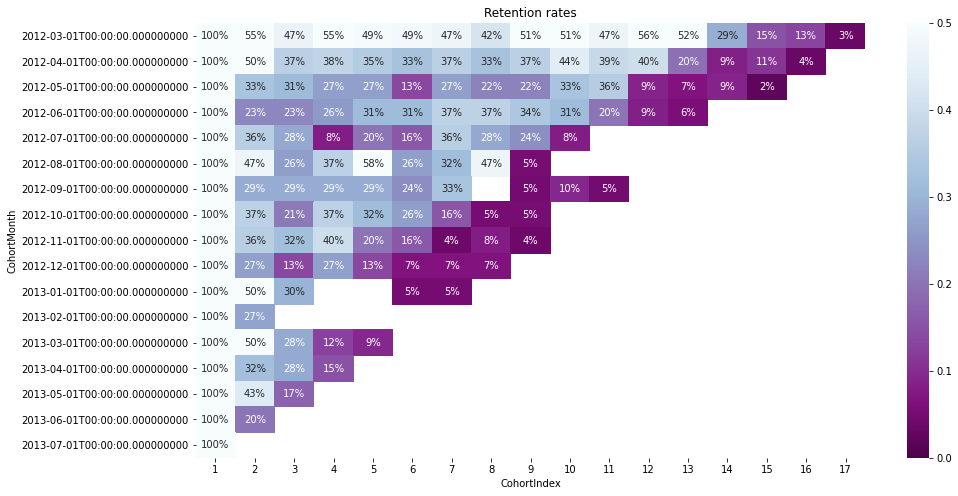

In [ ]:
#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()


In [ ]:
tx_uk = df1

tx_uk['InvoiceDate'] = pd.to_datetime(tx_uk['InvoiceDate'])

#create 3m and 6m dataframes
tx_3m = tx_uk[(tx_uk.InvoiceDate < datetime(2012,8,1)) & (tx_uk.InvoiceDate >= datetime(2012,3,2))].reset_index(drop=True)
tx_6m = tx_uk[(tx_uk.InvoiceDate >= datetime(2013,1,1)) & (tx_uk.InvoiceDate < datetime(2013,7,1))].reset_index(drop=True)

#create tx_user for assigning clustering
tx_user = pd.DataFrame(tx_3m['CustomerID'].unique())
tx_user.columns = ['CustomerID']

#order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final


#calculate recency score
tx_max_purchase = tx_3m.groupby('CustomerID').InvoiceDate.max().reset_index()
tx_max_purchase.columns = ['CustomerID','MaxPurchaseDate']
tx_max_purchase['Recency'] = (tx_max_purchase['MaxPurchaseDate'].max() - tx_max_purchase['MaxPurchaseDate']).dt.days
tx_user = pd.merge(tx_user, tx_max_purchase[['CustomerID','Recency']], on='CustomerID')

kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Recency']])
tx_user['RecencyCluster'] = kmeans.predict(tx_user[['Recency']])

tx_user = order_cluster('RecencyCluster', 'Recency',tx_user,False)

#calcuate frequency score
tx_frequency = tx_3m.groupby('CustomerID').InvoiceDate.count().reset_index()
tx_frequency.columns = ['CustomerID','Frequency']
tx_user = pd.merge(tx_user, tx_frequency, on='CustomerID')

kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Frequency']])
tx_user['FrequencyCluster'] = kmeans.predict(tx_user[['Frequency']])

tx_user = order_cluster('FrequencyCluster', 'Frequency',tx_user,True)

#calcuate revenue score
tx_3m['Revenue'] = tx_3m['Amount'] * tx_3m['Quantity']
tx_revenue = tx_3m.groupby('CustomerID').Revenue.sum().reset_index()
tx_user = pd.merge(tx_user, tx_revenue, on='CustomerID')

kmeans = KMeans(n_clusters=4)
kmeans.fit(tx_user[['Revenue']])
tx_user['RevenueCluster'] = kmeans.predict(tx_user[['Revenue']])
tx_user = order_cluster('RevenueCluster', 'Revenue',tx_user,True)


#overall scoring
tx_user['OverallScore'] = tx_user['RecencyCluster'] + tx_user['FrequencyCluster'] + tx_user['RevenueCluster']
tx_user['Segment'] = 'Low-Value'
tx_user.loc[tx_user['OverallScore']>2,'Segment'] = 'Mid-Value' 
tx_user.loc[tx_user['OverallScore']>4,'Segment'] = 'High-Value' 





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
tx_6m['Revenue'] = tx_6m['Amount'] * tx_6m['Quantity']
tx_user_6m = tx_6m.groupby('CustomerID')['Revenue'].sum().reset_index()
tx_user_6m.columns = ['CustomerID','m6_Revenue']


#plot LTV histogram
plot_data = [
    go.Histogram(
        x=tx_user_6m.query('m6_Revenue < 1000')['m6_Revenue']
    )
]

plot_layout = go.Layout(
        title='7m Revenue For 2013'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
tx_3m['Revenue'] = tx_3m['Amount'] * tx_3m['Quantity']
tx_user_3m = tx_3m.groupby('CustomerID')['Revenue'].sum().reset_index()
tx_user_3m.columns = ['CustomerID','m6_Revenue']


#plot LTV histogram
plot_data = [
    go.Histogram(
        x=tx_user_3m.query('m6_Revenue < 1000')['m6_Revenue']
    )
]

plot_layout = go.Layout(
        title='6m Revenue For 2012'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
tx_merge = pd.merge(tx_user, tx_user_6m, on='CustomerID', how='left')
tx_merge = tx_merge.fillna(0)

tx_graph = tx_merge.query("m6_Revenue < 1000")

plot_data = [
    go.Scatter(
        x=tx_graph.query("Segment == 'Low-Value'")['OverallScore'],
        y=tx_graph.query("Segment == 'Low-Value'")['m6_Revenue'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'Mid-Value'")['OverallScore'],
        y=tx_graph.query("Segment == 'Mid-Value'")['m6_Revenue'],
        mode='markers',
        name='Mid',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        go.Scatter(
        x=tx_graph.query("Segment == 'High-Value'")['OverallScore'],
        y=tx_graph.query("Segment == 'High-Value'")['m6_Revenue'],
        mode='markers',
        name='High',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
]

plot_layout = go.Layout(
        yaxis= {'title': "6m LTV"},
        xaxis= {'title': "RFM Score"},
        title='LTV'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
tx_merge = tx_merge[tx_merge['m6_Revenue']<tx_merge['m6_Revenue'].quantile(0.99)]


#creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(tx_merge[['m6_Revenue']])
tx_merge['LTVCluster'] = kmeans.predict(tx_merge[['m6_Revenue']])

#order cluster number based on LTV
tx_merge = order_cluster('LTVCluster', 'm6_Revenue',tx_merge,True)

#creatinga new cluster dataframe
tx_cluster = tx_merge.copy()

#see details of the clusters
tx_cluster.groupby('LTVCluster')['m6_Revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,238.0,4.519118,4.974854,0.00,0.000,3.690,7.3800,16.75
1,61.0,29.252131,9.592908,17.05,22.140,26.990,36.9000,51.66
2,26.0,78.052308,21.136194,54.65,62.205,66.815,95.0175,118.38


In [ ]:
tx_class = pd.get_dummies(tx_cluster)

#calculate and show correlations
corr_matrix = tx_class.corr()
corr_matrix['LTVCluster'].sort_values(ascending=False)

#create X and y, X will be feature set and y is the label - LTV
X = tx_class.drop(['LTVCluster','m6_Revenue'],axis=1)
y = tx_class['LTVCluster']

#split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=56)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

#XGBoost Multiclassification Model
ltv_xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1,objective= 'multi:softprob',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(ltv_xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(ltv_xgb_model.score(X_test[X_train.columns], y_test)))

y_pred = ltv_xgb_model.predict(X_test)
print('ss',classification_report(y_test, y_pred))

Accuracy of XGB classifier on training set: 1.00
Accuracy of XGB classifier on test set: 0.79
ss               precision    recall  f1-score   support

           0       0.88      0.92      0.90       110
           1       0.15      0.13      0.14        15
           2       0.25      0.14      0.18         7

    accuracy                           0.79       132
   macro avg       0.43      0.40      0.41       132
weighted avg       0.76      0.79      0.77       132



In [ ]:
df